# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
from api_keys import weather_api_key 
from citipy import citipy
import random
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('bmh')

## Generate Cities List

In [73]:
cities = []

while len(cities) < 500:
    city_obj = citipy.nearest_city(random.uniform(-90,90), random.uniform(-180,180))
    city = (city_obj.city_name, city_obj.country_code)
    
    if city not in cities:
        cities.append(city)


643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [94]:
def make_url(name, country):
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    url = f"{base_url}{name},{country}&appid={weather_api_key}"
    return url

data = []

for ind in range(len(cities)):
    print(f"Processing City {ind + 1} | {cities[ind][0]}")    
    url = make_url(cities[ind][0], cities[ind][1])
    response = requests.get(url)
    
    if response.status_code > 399:
        print("City not found. Continuing...")
#         print(f"Error: {response.status_code}")
#         print(response.json())
    else:
        data.append(response.json())
    


Processing City 1 | vaini
Processing City 2 | ossora
Processing City 3 | albany
Processing City 4 | hobart
Processing City 5 | shumskiy
Processing City 6 | semey
Processing City 7 | busselton
Processing City 8 | taseyevo
Processing City 9 | kahului
Processing City 10 | jaru
Processing City 11 | tasiilaq
Processing City 12 | kavieng
Processing City 13 | bredasdorp
Processing City 14 | vila velha
Processing City 15 | rikitea
Processing City 16 | cape town
Processing City 17 | solovetskiy
City not found. Continuing...
Processing City 18 | shimoda
Processing City 19 | kaitangata
Processing City 20 | belushya guba
City not found. Continuing...
Processing City 21 | puerto ayora
Processing City 22 | bengkulu
Processing City 23 | east london
Processing City 24 | mahebourg
Processing City 25 | athens
Processing City 26 | mundo nuevo
Processing City 27 | carbonia
Processing City 28 | kodiak
Processing City 29 | taolanaro
City not found. Continuing...
Processing City 30 | sept-iles
Processing Cit

Processing City 240 | tateyama
Processing City 241 | taltal
Processing City 242 | gat
City not found. Continuing...
Processing City 243 | pierre
Processing City 244 | mys shmidta
City not found. Continuing...
Processing City 245 | makakilo city
Processing City 246 | calabozo
Processing City 247 | vestmannaeyjar
Processing City 248 | temaraia
City not found. Continuing...
Processing City 249 | amapa
Processing City 250 | khorixas
Processing City 251 | pangnirtung
Processing City 252 | portland
Processing City 253 | resende
Processing City 254 | nizwa
Processing City 255 | hambantota
Processing City 256 | antsohihy
Processing City 257 | maine-soroa
Processing City 258 | ilulissat
Processing City 259 | nayoro
Processing City 260 | namatanai
Processing City 261 | onega
Processing City 262 | ambunti
Processing City 263 | hearst
Processing City 264 | artigas
Processing City 265 | cockburn town
Processing City 266 | ponta do sol
Processing City 267 | letterkenny
Processing City 268 | orlik
Pr

Processing City 476 | mahenge
Processing City 477 | agua prieta
Processing City 478 | sobolevo
Processing City 479 | bjornevatn
Processing City 480 | lermontovka
Processing City 481 | ostrovnoy
Processing City 482 | talaya
Processing City 483 | guanare
Processing City 484 | axim
Processing City 485 | victoria
Processing City 486 | chuy
Processing City 487 | zarubino
Processing City 488 | petropavlovsk-kamchatskiy
Processing City 489 | methoni
Processing City 490 | urucara
Processing City 491 | kurilsk
Processing City 492 | chimbote
Processing City 493 | port hedland
Processing City 494 | asau
City not found. Continuing...
Processing City 495 | semirom
Processing City 496 | sistranda
Processing City 497 | goundam
Processing City 498 | kokstad
Processing City 499 | calama
Processing City 500 | aykhal


In [105]:
datalist = []

for d in data:
    temp = d['main']['temp_max']
    fahr_temp = (temp - 273.15) * 1.8 + 32
    
    currdict = dict(city=d['name'], 
                   lat=d['coord']['lat'],
                   lng=d['coord']['lon'],
                   max_temp=fahr_temp,
                   humidity=d['main']['humidity'],
                   wind_speed=d['wind']['speed'],
                   cloudiness=d['clouds']['all'],
                   date=d['dt'],
                   country=d['sys']['country'])
    datalist.append(currdict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
df = pd.DataFrame(datalist)
df.head()

# make csv

,city,lat,lng,max_temp,humidity,wind_speed,cloudiness,date,country
0,Vaini,-21.20,-175.20,77.000,94,5.10,75,1602966345,TO
1,Ossora,59.24,163.07,33.296,84,2.75,3,1602966345,RU
2,Albany,-35.02,117.89,46.400,93,2.60,1,1602966345,AU
3,Hobart,-42.88,147.33,42.800,93,3.60,20,1602966116,AU
4,Shumskiy,54.83,99.13,38.210,76,1.97,99,1602966346,RU


In [108]:
df.describe()

,lat,lng,max_temp,humidity,wind_speed,cloudiness,date
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02
mean,18.474298,17.257684,60.917060,70.570156,3.817951,54.759465,1.602966e+09
std,34.789398,92.047211,21.664279,22.008016,2.602855,39.232481,8.093168e+01
min,-54.800000,-175.200000,3.056000,4.000000,0.210000,0.000000,1.602966e+09
25%,-10.450000,-60.620000,43.664000,61.000000,1.950000,16.000000,1.602966e+09
50%,18.690000,21.750000,66.200000,76.000000,3.100000,72.000000,1.602966e+09
75%,50.200000,100.350000,78.800000,86.000000,5.100000,91.000000,1.602966e+09
max,78.220000,179.320000,99.770000,100.000000,16.500000,100.000000,1.602966e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [79]:
df.head()

,city,lat,lng,max_temp,humidity,wind_speed,cloudiness,date,country
0,Vaini,-21.20,-175.20,298.15,94,4.60,75,1602965525,TO
1,Ossora,59.24,163.07,273.87,84,2.75,3,1602965526,RU
2,Albany,-35.02,117.89,281.15,93,2.60,1,1602965526,AU
3,Hobart,-42.88,147.33,279.15,93,3.60,20,1602965526,AU
4,Shumskiy,54.83,99.13,276.60,76,1.97,99,1602965526,RU


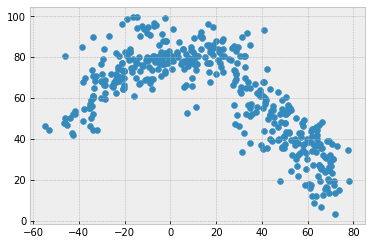

In [109]:
fig_temp, ax_temp = plt.subplots()
ax_temp.scatter(df['lat'], df['max_temp'])

# set title and whatnot

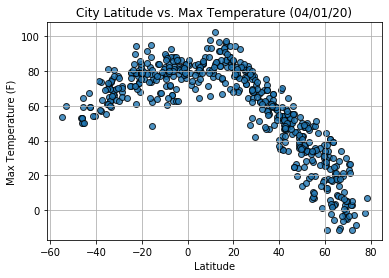

## Latitude vs. Humidity Plot

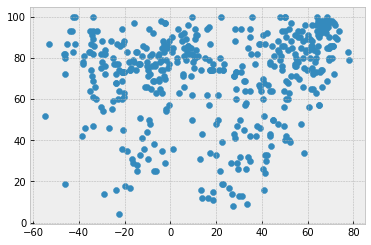

In [110]:
fig_humid, ax_humid = plt.subplots()
ax_humid.scatter(df['lat'], df['humidity'])

# set title and whatnot

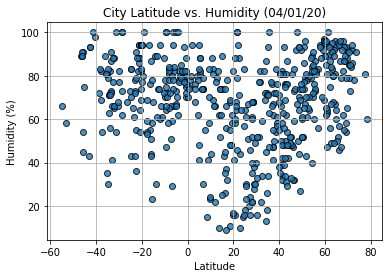

## Latitude vs. Cloudiness Plot

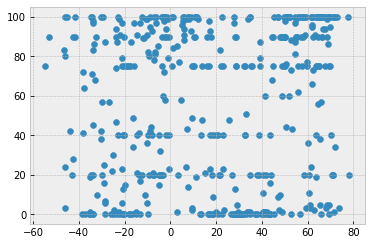

In [111]:
fig_cloud, ax_cloud = plt.subplots()
ax_cloud.scatter(df['lat'], df['cloudiness'])

# set title and whatnot

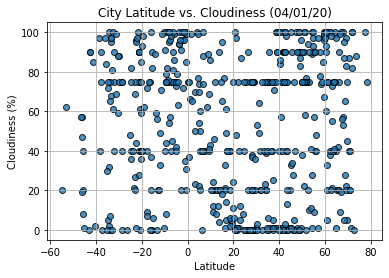

## Latitude vs. Wind Speed Plot

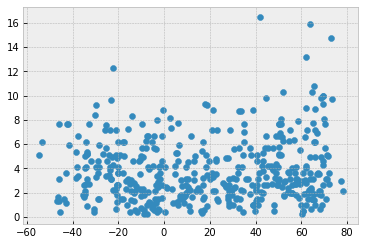

In [112]:
fig_wind, ax_wind = plt.subplots()
ax_wind.scatter(df['lat'], df['wind_speed'])

# set title and whatnot

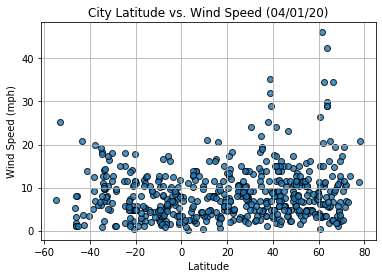

## Linear Regression

In [113]:
north = df[df['lat'] > 0]
south = df[df['lat'] < 0]

def regress(hemi, var):
    x = hemi['lat']
    y = hemi[var]
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    print(f"The r-value is: {rvalue}")
    
    regress = x * slope + intercept
    
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, regress)
    
    print(f"y = {round(slope,2)}x + {round(intercept,2)}")
    

The r-value is: -0.8714456964626334
y = -0.94x + 92.59


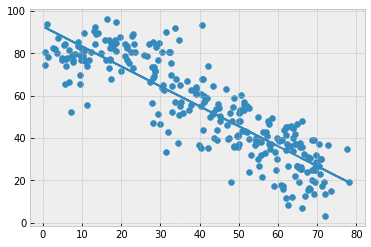

In [114]:
regress(north, 'max_temp')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


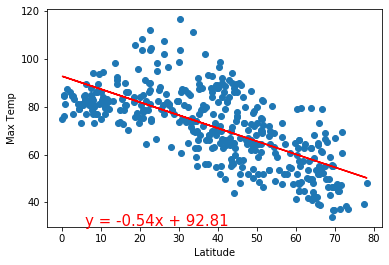

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6917904428421521
y = 0.68x + 86.18


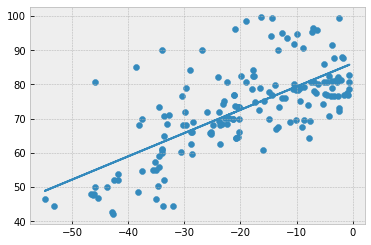

In [115]:
regress(south, 'max_temp')

The r-value is: 0.6082708688906918


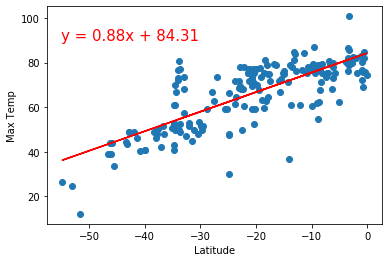

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27631047978296447
y = 0.3x + 58.97


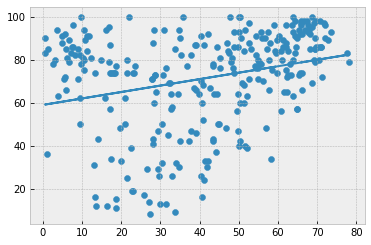

In [116]:
regress(north, 'humidity')

The r-value is: 0.000543987878808455


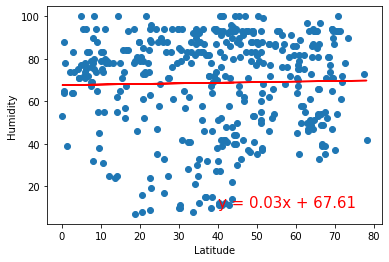

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.10935410568680151
y = -0.17x + 66.04


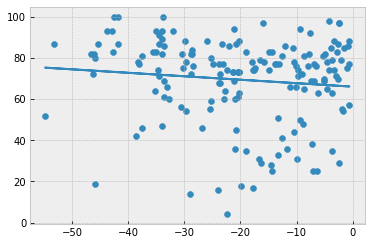

In [117]:
regress(south, 'humidity')

The r-value is: 0.014985174297345524


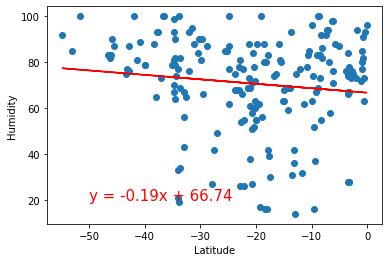

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1369815621822566
y = 0.26x + 45.21


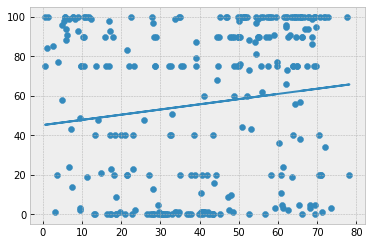

In [118]:
regress(north, 'cloudiness')

The r-value is: 0.0020898727664228514


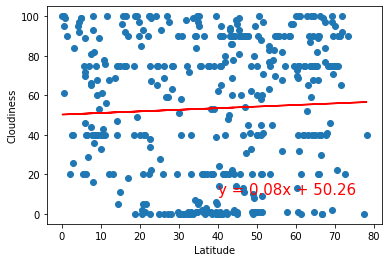

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11638393255568352
y = 0.33x + 59.2


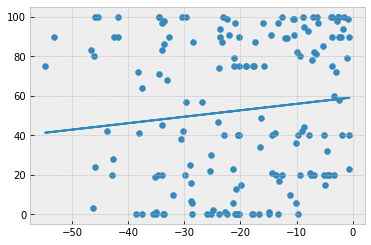

In [119]:
regress(south, 'cloudiness')

The r-value is: 0.0035263772085582894


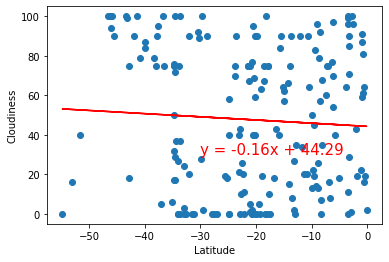

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18871133643483692
y = 0.02x + 2.9


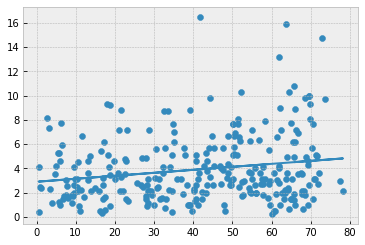

In [120]:
regress(north, 'wind_speed')

The r-value is: 0.04019723576144484


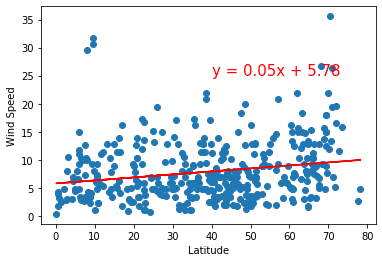

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13033286599483238
y = -0.02x + 3.21


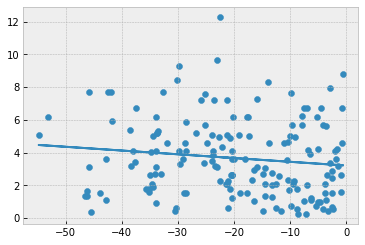

In [121]:
regress(south, 'wind_speed')

The r-value is: 0.017128274759839232


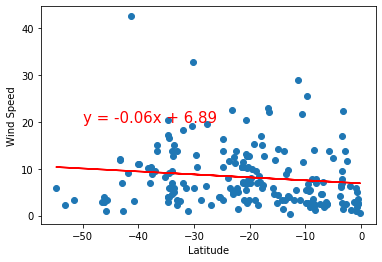

In [ ]:
# csvs and pngs 